<a href="https://colab.research.google.com/github/Tharungovind/GOVINDTHARUN_INFO5731_FALL2024/blob/main/Govind_Tharun_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [1]:
# Write your code here


import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset


def load_text_data(file_path):
    labels, reviews = [], []
    with open(file_path, 'r') as f:
        for line in f:
            label, review = line.strip().split(' ', 1)
            labels.append(int(label))
            reviews.append(review)
    return pd.DataFrame({'label': labels, 'review': reviews})

train_data = load_text_data("/content/stsa-train.txt")
test_data = load_text_data("/content/stsa-test.txt")

X_raw = train_data['review']
y = train_data['label']

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X_raw)



# Split into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
}

# Perform 10-fold cross-validation
cv_results = {}
for name, model in classifiers.items():
    print(f"\nTraining {name}...")
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} - Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# Train the best model (e.g., Logistic Regression)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

# Validate the model

y_pred_val = best_model.predict(X_val)
print("\nValidation Results:")
print(classification_report(y_val, y_pred_val))


X_test = vectorizer.transform(test_data['review'])
y_test = test_data['label']

# Evaluate the model on test data
y_pred_test = best_model.predict(X_test)
print("\nTest Results:")
print(classification_report(y_test, y_pred_test))




Training Naive Bayes...
Naive Bayes - Accuracy: 0.774 ± 0.019

Training Logistic Regression...
Logistic Regression - Accuracy: 0.767 ± 0.021

Training Support Vector Machine...
Support Vector Machine - Accuracy: 0.767 ± 0.022

Training Random Forest...
Random Forest - Accuracy: 0.719 ± 0.014

Validation Results:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       662
           1       0.75      0.81      0.78       722

    accuracy                           0.76      1384
   macro avg       0.77      0.76      0.76      1384
weighted avg       0.76      0.76      0.76      1384


Test Results:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       912
           1       0.76      0.84      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [2]:

# Write your code here

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
data = data.dropna(subset=["Reviews"])  # Drop rows with missing reviews
reviews = data["Reviews"].sample(5000, random_state=42).tolist()  # Subsample for faster computation


#look of the dataset
data.head()



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:

# Preprocess text

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text.lower())  # Remove special characters
    return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

preprocessed_reviews = [preprocess_text(review) for review in reviews]
# Feature Extraction: TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(preprocessed_reviews)


In [4]:
#
# K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
print(f"K-means Silhouette Score: {silhouette_score(tfidf_matrix, kmeans_labels):.3f}")


# DBSCAN Clustering
# Reduced eps and min_samples values
dbscan = DBSCAN(eps=0.5, min_samples=200, metric='cosine')
dbscan_labels = dbscan.fit_predict(tfidf_matrix)
print(f"DBSCAN Silhouette Score: {silhouette_score(tfidf_matrix, dbscan_labels):.3f}")

# # Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(tfidf_matrix.toarray())
print(f"Hierarchical Silhouette Score: {silhouette_score(tfidf_matrix, hierarchical_labels):.3f}")

# # Word2Vec Clustering
word2vec_model = Word2Vec([review.split() for review in preprocessed_reviews], vector_size=100, window=5, min_count=2, workers=4)
word2vec_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in review.split() if word in word2vec_model.wv]
                                         or [np.zeros(100)], axis=0) for review in preprocessed_reviews])
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
kmeans_w2v_labels = kmeans_w2v.fit_predict(word2vec_embeddings)
print(f"Word2Vec  Silhouette Score: {silhouette_score(word2vec_embeddings, kmeans_w2v_labels):.3f}")

# # BERT Clustering
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
bert_embeddings = bert_model.encode(preprocessed_reviews)
kmeans_bert = KMeans(n_clusters=5, random_state=42)
kmeans_bert_labels = kmeans_bert.fit_predict(bert_embeddings)
print(f"BERT K-means Silhouette Score: {silhouette_score(bert_embeddings, kmeans_bert_labels):.3f}")




K-means Silhouette Score: 0.034
DBSCAN Silhouette Score: 0.015
Hierarchical Silhouette Score: 0.027
Word2Vec  Silhouette Score: 0.441


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERT K-means Silhouette Score: 0.054


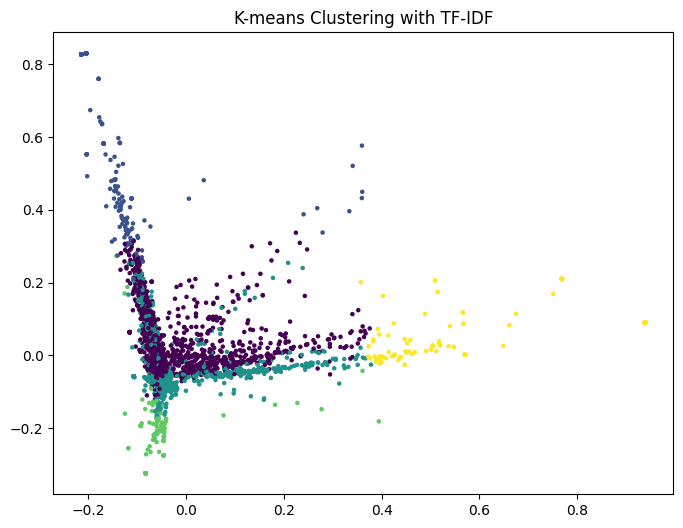

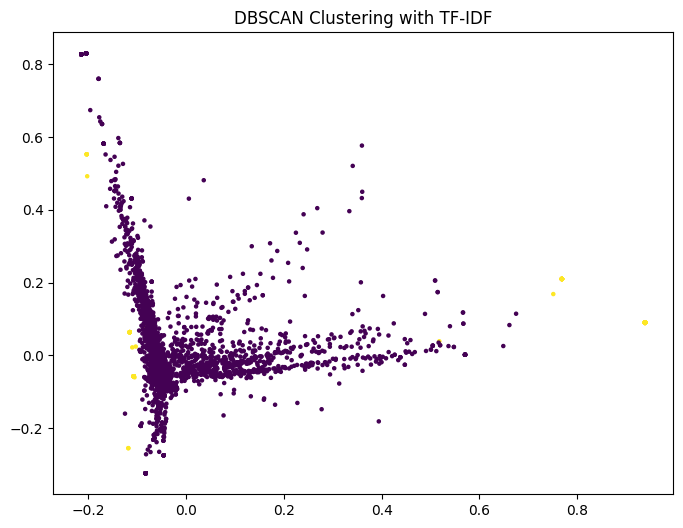

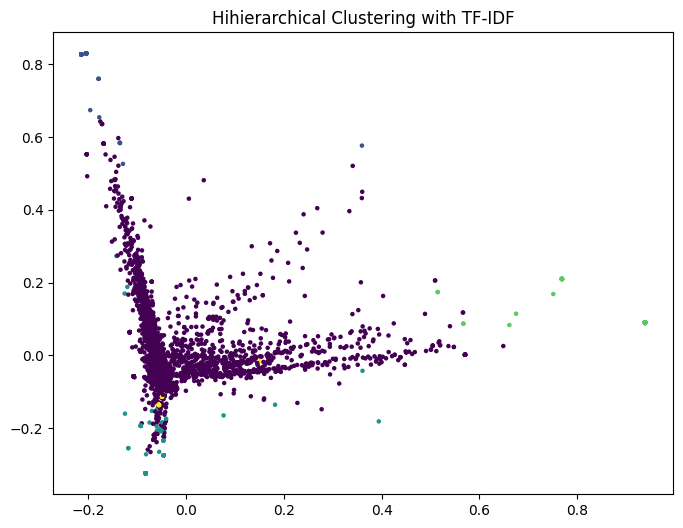

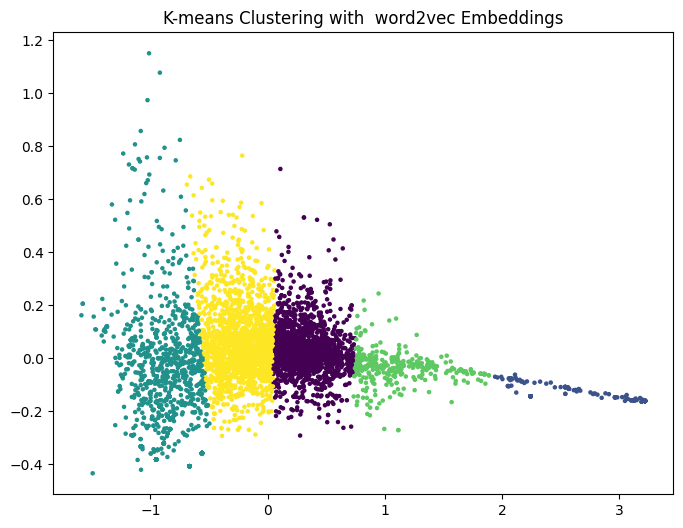

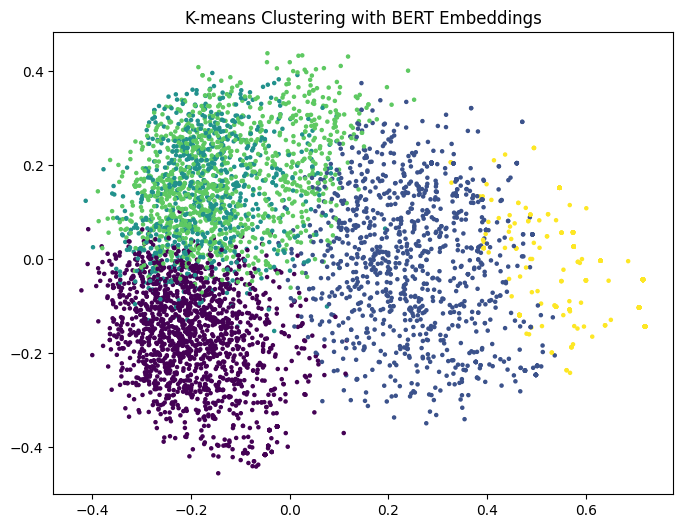

In [5]:
# Visualization of Clusters (PCA)
def plot_clusters(embeddings, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(embeddings)
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=5)
    plt.title(title)
    plt.show()

plot_clusters(tfidf_matrix.toarray(), kmeans_labels, "K-means Clustering with TF-IDF")


plot_clusters(tfidf_matrix.toarray(), dbscan_labels, "DBSCAN Clustering with TF-IDF")


plot_clusters(tfidf_matrix.toarray(), hierarchical_labels , "Hihierarchical Clustering with TF-IDF")



plot_clusters(word2vec_embeddings, kmeans_w2v_labels, "K-means Clustering with  word2vec Embeddings")

plot_clusters(bert_embeddings, kmeans_bert_labels, "K-means Clustering with BERT Embeddings")

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

    The clustering results from K-means using Word2Vec and BERT embeddings reveal distinct characteristics of the two approaches. The Word2Vec plot shows elongated and tightly packed clusters, indicating that Word2Vec effectively groups semantically similar text.
    However, the overlapping regions suggest limitations in capturing nuanced contextual information. On the other hand, the BERT-based plot displays better-separated but more dispersed clusters, leveraging BERT's deep contextual understanding, albeit with lower silhouette scores (0.054 for BERT vs. 0.449 for Word2Vec).
    Issues were observed with DBSCAN, particularly with eps = 5, where the algorithm either identified all points as one large cluster or marked most points as noise, highlighting its sensitivity to parameter tuning. These results suggest that while Word2Vec offers better silhouette scores, BERT embeddings provide more nuanced semantic clusters, though they may require further parameter optimization for improved performance.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



- This assignment provided a hands-on understanding of text clustering and classification techniques, including K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT. Word2Vec embeddings captured semantic relationships effectively, while BERT offered deeper contextual understanding, though fine-tuning was needed for better cluster separation. Challenges with DBSCAN highlighted the sensitivity of density-based methods to parameter selection. Overall, the exercise reinforced the importance of preprocessing, feature extraction, and evaluation metrics in both clustering and classification tasks, and it emphasized the trade-offs between computational complexity, interpretability, and clustering quality
'''